#Import the library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
!pip install transformers 

     |████████████████████████████████| 3.8 MB 5.3 MB/s 
     |████████████████████████████████| 895 kB 32.5 MB/s 
     |████████████████████████████████| 67 kB 5.2 MB/s 
     |████████████████████████████████| 596 kB 28.2 MB/s 
     |████████████████████████████████| 6.5 MB 33.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import torch 
from transformers import BertForQuestionAnswering, BertTokenizer

#Preprocess Data

##Data Loading

In [ ]:
coqa = pd.read_json("http://downloads.cs.stanford.edu/nlp/data/coqa/coqa-train-v1.0.json")
coqa.head()

,version,data
0,1,"{'source': 'wikipedia', 'id': '3zotghdk5ibi9ce..."
1,1,"{'source': 'cnn', 'id': '3wj1oxy92agboo5nlq4r7..."
2,1,"{'source': 'gutenberg', 'id': '3bdcf01ogxu7zdn..."
3,1,"{'source': 'cnn', 'id': '3ewijtffvo7wwchw6rtya..."
4,1,"{'source': 'gutenberg', 'id': '3urfvvm165iantk..."


In [ ]:
coqa["data"][1]

{'answers': [{'input_text': 'Hard Rock Cafe',
   'span_end': 284,
   'span_start': 243,
   'span_text': "Hard Rock Cafe in New York's Times Square",
   'turn_id': 1},
  {'input_text': '$2 million.',
   'span_end': 210,
   'span_start': 180,
   'span_text': ' reaping a total $2 million. \n',
   'turn_id': 2},
  {'input_text': '$120,000',
   'span_end': 342,
   'span_start': 292,
   'span_text': ' pre-sale expectations of only $120,000 in sales. ',
   'turn_id': 3},
  {'input_text': 'Hoffman Ma',
   'span_end': 1365,
   'span_start': 1295,
   'span_text': 'Hoffman Ma, who bought the glove on behalf of Ponte 16 Resort in Macau',
   'turn_id': 4},
  {'bad_turn': 'true',
   'input_text': 'Macau',
   'span_end': 1366,
   'span_start': 1331,
   'span_text': 'behalf of Ponte 16 Resort in Macau,',
   'turn_id': 5}],
 'filename': 'cnn_fe05c61a7e48461f7883cdec387567029614f07b.story',
 'id': '3wj1oxy92agboo5nlq4r7bndc3t8a8',
 'name': 'cnn_fe05c61a7e48461f7883cdec387567029614f07b.story',
 'question

##Data Cleaning

In [ ]:
del coqa["version"]

In [ ]:
coqa.head()

,data
0,"{'source': 'wikipedia', 'id': '3zotghdk5ibi9ce..."
1,"{'source': 'cnn', 'id': '3wj1oxy92agboo5nlq4r7..."
2,"{'source': 'gutenberg', 'id': '3bdcf01ogxu7zdn..."
3,"{'source': 'cnn', 'id': '3ewijtffvo7wwchw6rtya..."
4,"{'source': 'gutenberg', 'id': '3urfvvm165iantk..."


In [ ]:
cols = ["text", "questions", "answers"]

comp_list = []
for index, row in coqa.iterrows():
  for i in range(len(row["data"]["questions"])):
    temp_list = []
    temp_list.append(row["data"]["story"])
    temp_list.append(row["data"]["questions"][i]["input_text"])
    temp_list.append(row["data"]["answers"][i]["input_text"])
    comp_list.append(temp_list)

new_df = pd.DataFrame(comp_list, columns=cols) 

##Saving Data to CSV File

In [ ]:
new_df.to_csv("CoQA_data.csv", index = False)

##Load File CSV 

In [ ]:
df = pd.read_csv("CoQA_data.csv")

In [ ]:
df.head()

,text,questions,answers
0,"The Vatican Apostolic Library (), more commonl...",When was the Vat formally opened?,It was formally established in 1475
1,"The Vatican Apostolic Library (), more commonl...",what is the library for?,research
2,"The Vatican Apostolic Library (), more commonl...",for what subjects?,"history, and law"
3,"The Vatican Apostolic Library (), more commonl...",and?,"philosophy, science and theology"
4,"The Vatican Apostolic Library (), more commonl...",what was started in 2014?,a project


In [ ]:
coqa["data"][0]

{'answers': [{'input_text': 'It was formally established in 1475',
   'span_end': 179,
   'span_start': 151,
   'span_text': 'Formally established in 1475',
   'turn_id': 1},
  {'input_text': 'research',
   'span_end': 494,
   'span_start': 454,
   'span_text': 'he Vatican Library is a research library',
   'turn_id': 2},
  {'input_text': 'history, and law',
   'span_end': 511,
   'span_start': 457,
   'span_text': 'Vatican Library is a research library for history, law',
   'turn_id': 3},
  {'input_text': 'philosophy, science and theology',
   'span_end': 545,
   'span_start': 457,
   'span_text': 'Vatican Library is a research library for history, law, philosophy, science and theology',
   'turn_id': 4},
  {'input_text': 'a  project',
   'span_end': 879,
   'span_start': 769,
   'span_text': 'March 2014, the Vatican Library began an initial four-year project of digitising its collection of manuscripts',
   'turn_id': 5},
  {'input_text': 'into periods',
   'span_end': 1127,
   'span_

In [ ]:
print("Number of question and answers: ", len(df))

Number of question and answers:  108647


#Building The ChatBot

In [ ]:
model = BertForQuestionAnswering.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")
tokenizer = BertTokenizer.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")

Downloading:   0%|          | 0.00/443 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

In [ ]:
random_num = np.random.randint(0, len(df)) 
question = df["questions"][random_num]
text = df["text"][random_num]

In [ ]:
random_num

17762

In [ ]:
question

'Who is on trial?'

In [ ]:
text

'(CNN) -- Jurors did not reach a verdict in their first day of deliberations Monday in the trial of Steven Hayes, the man accused of killing three members of a Connecticut family in a 2007 home invasion. \n\nThey are expected to resume their work Tuesday morning. \n\nHayes, 47, who has pleaded not guilty, is on trial in New Haven, Connecticut, for the murders of Jennifer Hawke-Petit and her two daughters. \n\nThe killings took place in the New Haven suburb of Cheshire early July 23, 2007. The home of William Petit, his wife, Hawke-Petit, and two daughters was invaded in the middle of the night by Hayes and co-defendant Joshua Komisarjevsky, prosecutors say. \n\nKomisarjevsky will be tried separately. \n\nJudge Jon Blue gave instructions Monday morning and told the jury: "You are the sole judges of the facts." \n\n"We\'re in the home stretch," the judge said after going over all 17 counts with the jury. "No one will hurry you to produce a verdict." \n\nTheir first duty will be to pick a

In [ ]:
print(question, "\n", text)

Who is on trial? 
 (CNN) -- Jurors did not reach a verdict in their first day of deliberations Monday in the trial of Steven Hayes, the man accused of killing three members of a Connecticut family in a 2007 home invasion. 

They are expected to resume their work Tuesday morning. 

Hayes, 47, who has pleaded not guilty, is on trial in New Haven, Connecticut, for the murders of Jennifer Hawke-Petit and her two daughters. 

The killings took place in the New Haven suburb of Cheshire early July 23, 2007. The home of William Petit, his wife, Hawke-Petit, and two daughters was invaded in the middle of the night by Hayes and co-defendant Joshua Komisarjevsky, prosecutors say. 

Komisarjevsky will be tried separately. 

Judge Jon Blue gave instructions Monday morning and told the jury: "You are the sole judges of the facts." 

"We're in the home stretch," the judge said after going over all 17 counts with the jury. "No one will hurry you to produce a verdict." 

Their first duty will be to pic

In [ ]:
input_ids = tokenizer.encode(question, text)
print("The input has a total of {} tokens.".format(len(input_ids)))

The input has a total of 332 tokens.


In [ ]:
input_ids

[101,
 2040,
 2003,
 2006,
 3979,
 1029,
 102,
 1006,
 13229,
 1007,
 1011,
 1011,
 18414,
 29165,
 2015,
 2106,
 2025,
 3362,
 1037,
 14392,
 1999,
 2037,
 2034,
 2154,
 1997,
 3972,
 20755,
 28893,
 6928,
 1999,
 1996,
 3979,
 1997,
 7112,
 10192,
 1010,
 1996,
 2158,
 5496,
 1997,
 4288,
 2093,
 2372,
 1997,
 1037,
 6117,
 2155,
 1999,
 1037,
 2289,
 2188,
 5274,
 1012,
 2027,
 2024,
 3517,
 2000,
 13746,
 2037,
 2147,
 9857,
 2851,
 1012,
 10192,
 1010,
 4700,
 1010,
 2040,
 2038,
 12254,
 2025,
 5905,
 1010,
 2003,
 2006,
 3979,
 1999,
 2047,
 4033,
 1010,
 6117,
 1010,
 2005,
 1996,
 9916,
 1997,
 7673,
 24882,
 1011,
 17268,
 1998,
 2014,
 2048,
 5727,
 1012,
 1996,
 16431,
 2165,
 2173,
 1999,
 1996,
 2047,
 4033,
 7575,
 1997,
 13789,
 2220,
 2251,
 2603,
 1010,
 2289,
 1012,
 1996,
 2188,
 1997,
 2520,
 17268,
 1010,
 2010,
 2564,
 1010,
 24882,
 1011,
 17268,
 1010,
 1998,
 2048,
 5727,
 2001,
 10836,
 1999,
 1996,
 2690,
 1997,
 1996,
 2305,
 2011,
 10192,
 1998,
 2522,
 10

In [ ]:
tokens = tokenizer.convert_ids_to_tokens(input_ids)
for token, id in zip(tokens, input_ids):
  print('{:8}{:8,}'.format(token,id))

[CLS]        101
who        2,040
is         2,003
on         2,006
trial      3,979
?          1,029
[SEP]        102
(          1,006
cnn       13,229
)          1,007
-          1,011
-          1,011
ju        18,414
##ror     29,165
##s        2,015
did        2,106
not        2,025
reach      3,362
a          1,037
verdict   14,392
in         1,999
their      2,037
first      2,034
day        2,154
of         1,997
del        3,972
##ibe     20,755
##rations  28,893
monday     6,928
in         1,999
the        1,996
trial      3,979
of         1,997
steven     7,112
hayes     10,192
,          1,010
the        1,996
man        2,158
accused    5,496
of         1,997
killing    4,288
three      2,093
members    2,372
of         1,997
a          1,037
connecticut   6,117
family     2,155
in         1,999
a          1,037
2007       2,289
home       2,188
invasion   5,274
.          1,012
they       2,027
are        2,024
expected   3,517
to         2,000
resume    13,746
their     

In [ ]:
type(tokenizer.vocab)

collections.OrderedDict

In [ ]:
tokenizer.vocab["hard"]

2524

In [ ]:
tokenizer.vocab["heart"]

2540

In [ ]:
tokenizer.vocab_size

30522

In [ ]:
#first occurence of [SEP] token
sep_idx = input_ids.index(tokenizer.sep_token_id)
print(sep_idx)

#number of tokens in segment A - question
num_seg_a = sep_idx + 1
print("Number of tokens in segment A: ", num_seg_a)

#number of tokens in segment B - text
num_seg_b = len(input_ids) - num_seg_a
print("Number of tokens in segment B: ", num_seg_b)

segment_ids = [0]*num_seg_a + [1]*num_seg_b
print(segment_ids)

assert len(segment_ids) == len(input_ids)

6
Number of tokens in segment A:  7
Number of tokens in segment B:  325
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
#token input_ids to represent the input
#token segment_ids to differentiate our segments - text and question 
output = model(torch.tensor([input_ids]), token_type_ids=torch.tensor([segment_ids]))
print(output.start_logits, output.end_logits)

tensor([[-0.6337, -7.6538, -8.0966, -7.3696, -8.2080, -9.3986, -0.6338, -7.2276,
         -6.2174, -8.3487, -7.0166, -7.6264, -4.0566, -7.8382, -8.2678, -8.2021,
         -7.8328, -8.3766, -8.4978, -7.6497, -8.8992, -7.9857, -8.0484, -8.2092,
         -8.7986, -7.7965, -8.4711, -8.3028, -5.7352, -3.9318,  0.6044, -1.0398,
         -3.5284,  6.5239,  2.3427, -4.3920, -0.1571, -2.3419, -3.7103, -6.5881,
         -4.4991, -6.6955, -7.5071, -8.5647, -7.6819, -5.2913, -6.1063, -8.0983,
         -7.3700, -5.2202, -4.8843, -5.2466, -6.4077, -4.9374, -7.7207, -6.3601,
         -8.0449, -7.6679, -8.0442, -7.0191, -4.7270, -6.5922, -0.6334,  2.6317,
         -4.6030, -1.7538, -5.7510, -3.2945, -4.5137, -3.7936, -4.2097, -6.2216,
         -5.7386, -2.8289, -2.7690, -4.1700, -4.5979, -3.1054, -5.9296, -7.6847,
         -4.5377, -6.7286, -2.5197, -1.8947, -0.8365, -6.5133, -0.8102, -4.1164,
         -7.0016, -5.0227, -7.1750, -7.0004, -6.8321, -5.6639, -6.8173, -6.2754,
         -4.7490, -7.8466, -

In [ ]:
output.start_logits.size()

torch.Size([1, 332])

Looking at the most probable start and end words and providing answers only if the end token is after the start token.

In [ ]:
#tokens with highest start and end scores
answer_start = torch.argmax(output.start_logits)
answer_end = torch.argmax(output.end_logits)
print(answer_start, answer_end)

tensor(33) tensor(34)


In [ ]:
if answer_end >= answer_start:
    answer = " ".join(tokens[answer_start:answer_end+1])
else:
    print("I am unable to find the answer to this question. Can you please ask another question?")
    
print("Text:\n{}".format(text.capitalize()))
print("\nQuestion:\n{}".format(question.capitalize()))
print("\nAnswer:\n{}.".format(answer.capitalize()))

Text:
(cnn) -- jurors did not reach a verdict in their first day of deliberations monday in the trial of steven hayes, the man accused of killing three members of a connecticut family in a 2007 home invasion. 

they are expected to resume their work tuesday morning. 

hayes, 47, who has pleaded not guilty, is on trial in new haven, connecticut, for the murders of jennifer hawke-petit and her two daughters. 

the killings took place in the new haven suburb of cheshire early july 23, 2007. the home of william petit, his wife, hawke-petit, and two daughters was invaded in the middle of the night by hayes and co-defendant joshua komisarjevsky, prosecutors say. 

komisarjevsky will be tried separately. 

judge jon blue gave instructions monday morning and told the jury: "you are the sole judges of the facts." 

"we're in the home stretch," the judge said after going over all 17 counts with the jury. "no one will hurry you to produce a verdict." 

their first duty will be to pick a foreman, 

##Visualize of the tokens

In [ ]:
tokens

['[CLS]',
 'who',
 'is',
 'on',
 'trial',
 '?',
 '[SEP]',
 '(',
 'cnn',
 ')',
 '-',
 '-',
 'ju',
 '##ror',
 '##s',
 'did',
 'not',
 'reach',
 'a',
 'verdict',
 'in',
 'their',
 'first',
 'day',
 'of',
 'del',
 '##ibe',
 '##rations',
 'monday',
 'in',
 'the',
 'trial',
 'of',
 'steven',
 'hayes',
 ',',
 'the',
 'man',
 'accused',
 'of',
 'killing',
 'three',
 'members',
 'of',
 'a',
 'connecticut',
 'family',
 'in',
 'a',
 '2007',
 'home',
 'invasion',
 '.',
 'they',
 'are',
 'expected',
 'to',
 'resume',
 'their',
 'work',
 'tuesday',
 'morning',
 '.',
 'hayes',
 ',',
 '47',
 ',',
 'who',
 'has',
 'pleaded',
 'not',
 'guilty',
 ',',
 'is',
 'on',
 'trial',
 'in',
 'new',
 'haven',
 ',',
 'connecticut',
 ',',
 'for',
 'the',
 'murders',
 'of',
 'jennifer',
 'hawke',
 '-',
 'petit',
 'and',
 'her',
 'two',
 'daughters',
 '.',
 'the',
 'killings',
 'took',
 'place',
 'in',
 'the',
 'new',
 'haven',
 'suburb',
 'of',
 'cheshire',
 'early',
 'july',
 '23',
 ',',
 '2007',
 '.',
 'the',
 'hom

In [ ]:
start_scores = output.start_logits.detach().numpy().flatten()
end_scores = output.end_logits.detach().numpy().flatten()

token_labels = []
for i, token in enumerate(tokens):
    token_labels.append("{}-{}".format(token,i))

In [ ]:
print(len(token_labels))

332


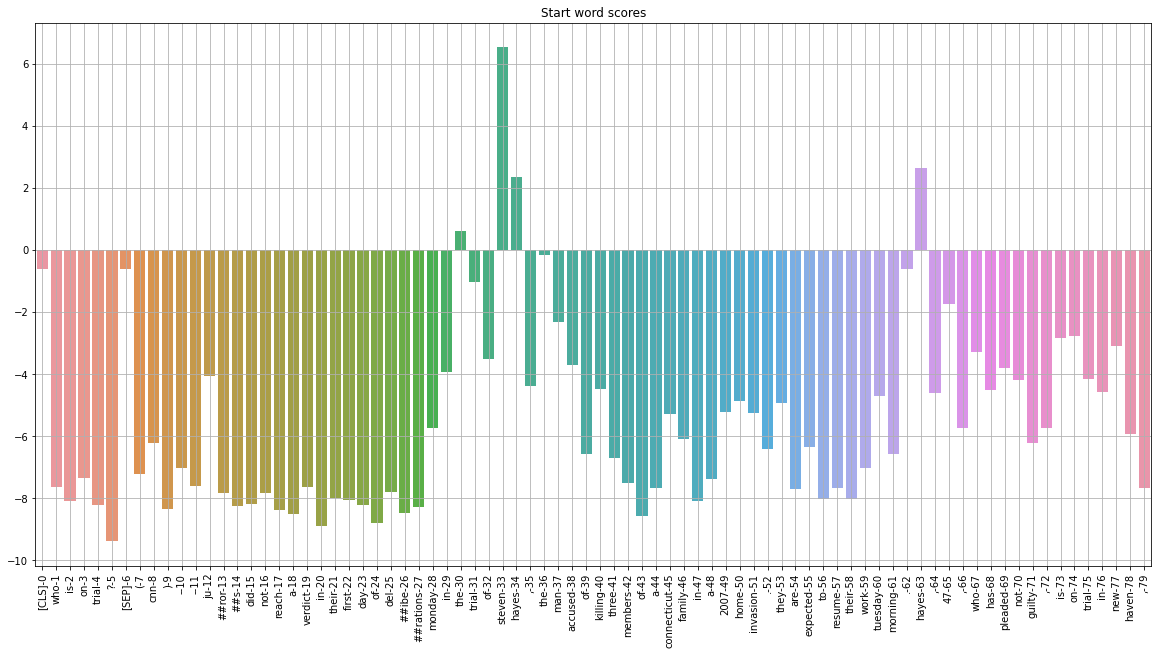

In [ ]:
#first 100 tokens
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(x=token_labels[:80], y=start_scores[:80], ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title("Start word scores")
plt.show()

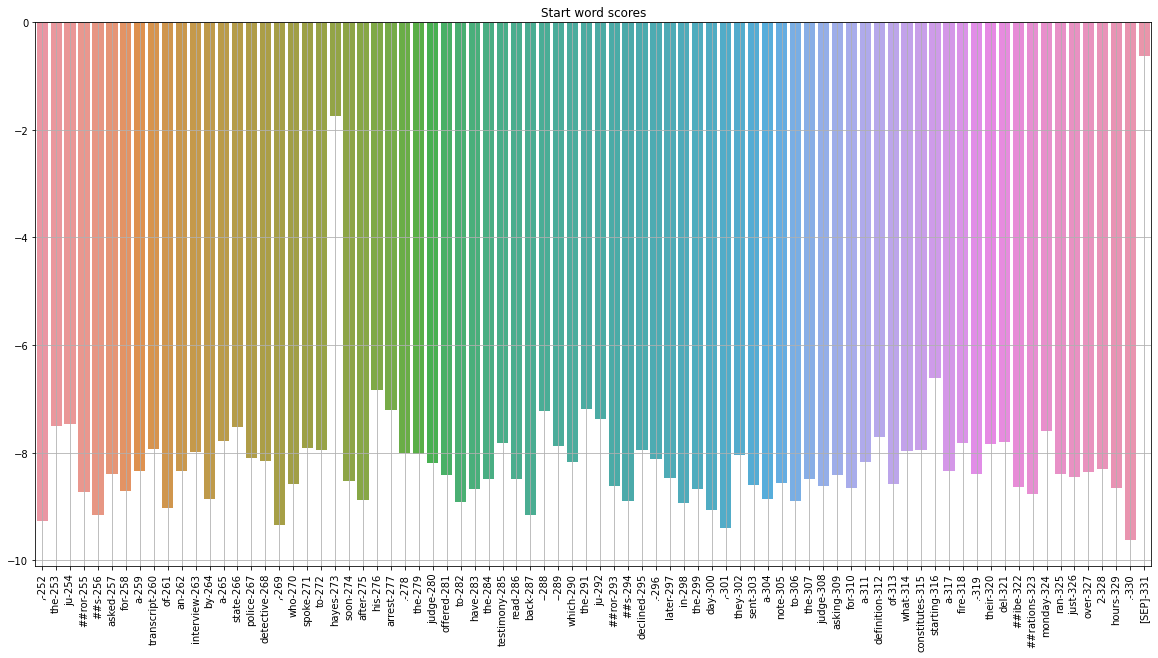

In [ ]:
#last 100 tokens
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(x=token_labels[-80:], y=start_scores[-80:], ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title("Start word scores")
plt.show()


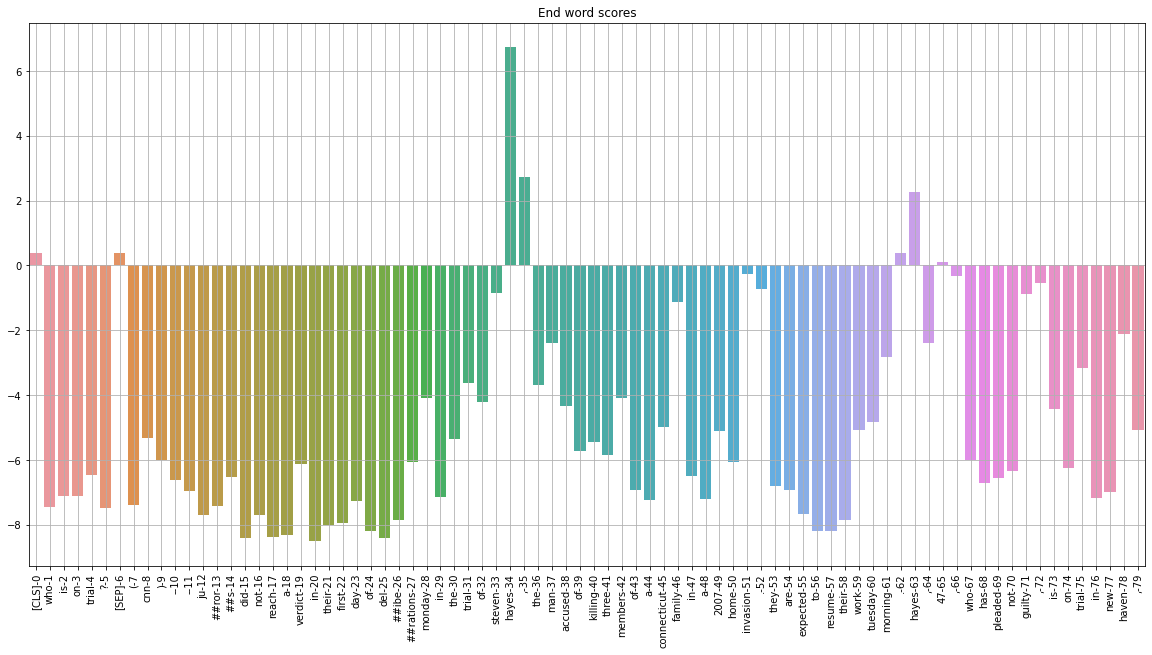

In [ ]:
#first 100 tokens
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(x=token_labels[:80], y=end_scores[:80], ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title("End word scores")
plt.show()

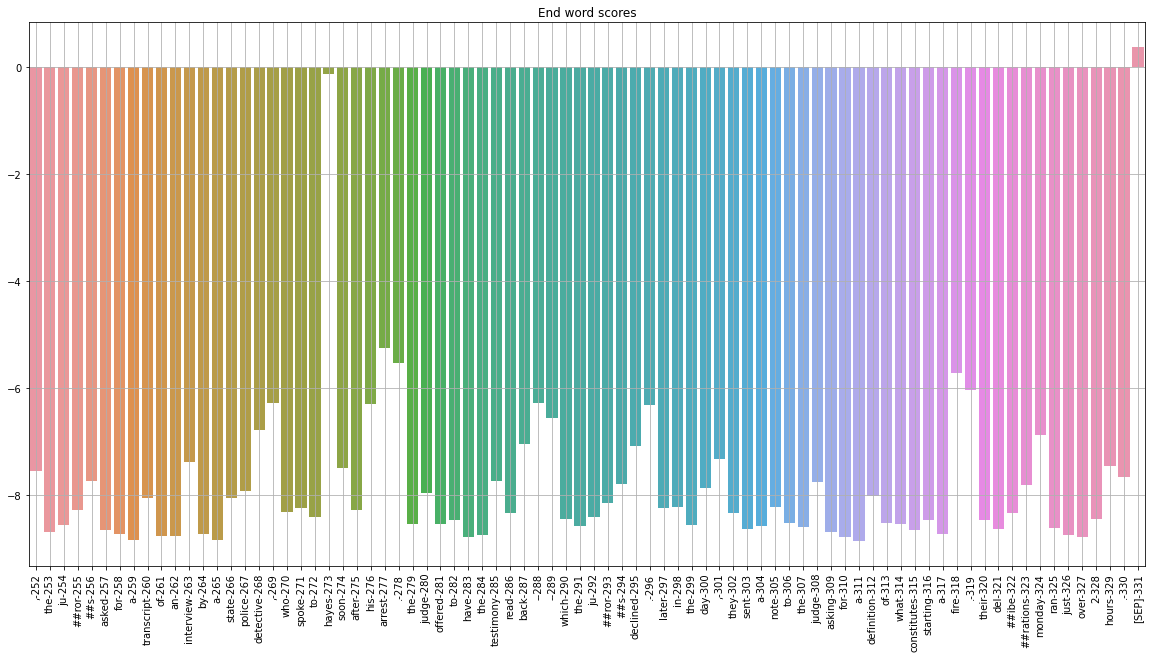

In [ ]:
#last 100 tokens
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(x=token_labels[-80:], y=end_scores[-80:], ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title("End word scores")
plt.show()


#Code to join broken words

In [ ]:
answer = tokens[answer_start]

for i in range(answer_start+1, answer_end+1):
    if tokens[i][0:2] == "##":
        answer += tokens[i][2:]
    else:
        answer += " " + tokens[i]

#Function

In [ ]:
tokenizer.mask_token_id

103

In [ ]:
tokenizer.sep_token_id

102

In [ ]:
tokenizer.cls_token_id

101

In [ ]:
tokenizer.max_len_sentences_pair

509

In [ ]:
tokenizer.max_len_single_sentence

510

In [ ]:
input_ids.index(2000)

56

In [ ]:
input_ids.index(102)

6

In [ ]:
def question_answer(question, text):

  #tokenize question and text in ids as a pair
  input_ids = tokenizer.encode(question, text)
  #string version of tokenized ids
  tokens = tokenizer.convert_ids_to_tokens(input_ids)
  #segment IDs
  #first occurence of [SEP] token
  sep_idx = input_ids.index(tokenizer.sep_token_id)
  #number of tokens in segment A - question
  num_seg_a = sep_idx + 1
  #number of tokens in segment B - text
  num_seg_b = len(input_ids) - num_seg_a
  #list of 0s and 1s
  segment_ids = [0]*num_seg_a + [1]*num_seg_b

  assert len(segment_ids) == len(input_ids)

  #model output using input_ids and segment_ids
  output = model(torch.tensor([input_ids]), token_type_ids = torch.tensor([segment_ids]))

   #reconstructing the answer
  answer_start = torch.argmax(output.start_logits)
  answer_end = torch.argmax(output.end_logits)

  if answer_end >= answer_start:
    answer = (tokens[answer_start])
    for i in range(answer_start+1, answer_end+1):
      if tokens[i][0:2] == "##":
        answer += tokens[i][2:]
      else:
        answer += " " + tokens[i]
  
  if answer.startswith("[CLS]"):
    answer = "Unable to find the answer to your question."
  
  print("\nAnswer:\n{}".format(answer.capitalize()))

In [ ]:
text = """New York (CNN) -- More than 80 Michael Jackson collectibles -- including the late pop star's famous rhinestone-studded glove from a 1983 performance -- were auctioned off Saturday, reaping a total $2 million. Profits from the auction at the Hard Rock Cafe in New York's Times Square crushed pre-sale expectations of only $120,000 in sales. The highly prized memorabilia, which included items spanning the many stages of Jackson's career, came from more than 30 fans, associates and family members, who contacted Julien's Auctions to sell their gifts and mementos of the singer. Jackson's flashy glove was the big-ticket item of the night, fetching $420,000 from a buyer in Hong Kong, China. Jackson wore the glove at a 1983 performance during \"Motown 25,\" an NBC special where he debuted his revolutionary moonwalk. Fellow Motown star Walter \"Clyde\" Orange of the Commodores, who also performed in the special 26 years ago, said he asked for Jackson's autograph at the time, but Jackson gave him the glove instead. "The legacy that [Jackson] left behind is bigger than life for me,\" Orange said. \"I hope that through that glove people can see what he was trying to say in his music and what he said in his music.\" Orange said he plans to give a portion of the proceeds to charity. Hoffman Ma, who bought the glove on behalf of Ponte 16 Resort in Macau, paid a 25 percent buyer's premium, which was tacked onto all final sales over $50,000. Winners of items less than $50,000 paid a 20 percent premium."""
question = "Where was the Auction held?"

In [ ]:
question_answer(question, text)


Answer:
Hard rock cafe in new york ' s times square


In [ ]:
print("Original answer:\n", df.loc[df["questions"] == question]["answers"].values[0])

Original answer:
 Hard Rock Cafe


#Playing with the chatbot

In [ ]:
text = input("Please enter your text: \n")
question = input("\nPlease enter your question: \n")

while True:
  question_answer(question, text)

  flag = True
  flag_N = False

  while flag:
    response = input("\nDo you want to ask another question based on this text (Y/N)? ")
    if response[0] == "Y" or response[0] == "y":
      question = input("\nPlease enter your question: \n")
      flag = False 
    elif response[0] == "N" or response[0] == "n":
      print("\nBye!")
      flag = False
      flag_N = True
  if flag_N == True:
    break

Please enter your text: 
The Vatican Apostolic Library (), more commonly called the Vatican Library or simply the Vat, is the library of the Holy See, located in Vatican City. Formally established in 1475, although it is much older, it is one of the oldest libraries in the world and contains one of the most significant collections of historical texts. It has 75,000 codices from throughout history, as well as 1.1 million printed books, which include some 8,500 incunabula.   The Vatican Library is a research library for history, law, philosophy, science and theology. The Vatican Library is open to anyone who can document their qualifications and research needs. Photocopies for private study of pages from books published between 1801 and 1990 can be requested in person or by mail.   In March 2014, the Vatican Library began an initial four-year project of digitising its collection of manuscripts, to be made available online.   The Vatican Secret Archives were separated from the library at 

In [ ]:
text = """The 34-year-old, who started his professional career with Barca and is their record scorer with 672 goals, joined PSG on a two-year deal in the close season after being told by the Catalan club they could not afford to keep him.
"I came back to Barcelona (from the Copa America in July) to prepare for the season, after taking advantage of the extra days of vacation that the coach (Ronald Koeman) had given me," Messi told France Football in an interview released on Saturday.

"I had in mind to sign my contract and to start training right away. I thought that everything was settled and that all that was missing was my signature (on the contract).

"But when I arrived in Barcelona, I was told that it was no longer possible, that I could not stay and that I had to find another club, because Barca could not afford to extend my contract. That changed my plans."""

In [ ]:
text = input("Please enter your text: \n")
question = input("\nPlease enter your question: \n")

while True:
  question_answer(question, text)

  flag = True
  flag_N = False

  while flag:
    response = input("\nDo you want to ask another question based on this text (Y/N)? ")
    if response[0] == "Y" or response[0] == "y":
      question = input("\nPlease enter your question: \n")
      flag = False 
    elif response[0] == "N" or response[0] == "n":
      print("\nBye!")
      flag = False
      flag_N = True
  if flag_N == True:
    break

Please enter your text: 
The 34-year-old, who started his professional career with Barca and is their record scorer with 672 goals, joined PSG on a two-year deal in the close season after being told by the Catalan club they could not afford to keep him. "I came back to Barcelona (from the Copa America in July) to prepare for the season, after taking advantage of the extra days of vacation that the coach (Ronald Koeman) had given me," Messi told France Football in an interview released on Saturday.  "I had in mind to sign my contract and to start training right away. I thought that everything was settled and that all that was missing was my signature (on the contract).  "But when I arrived in Barcelona, I was told that it was no longer possible, that I could not stay and that I had to find another club, because Barca could not afford to extend my contract. That changed my plans.

Please enter your question: 
How old is Messi?

Answer:
34

Do you want to ask another question based on thi

In [ ]:
torch.__version__

'1.10.0+cu111'

**Reference**: https://towardsdatascience.com/question-answering-with-a-fine-tuned-bert-bc4dafd45626